In [1]:
#Import packages to convert pdf to txt
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

In [2]:
#Function to convert pdf to txt
def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
        interpreter.process_page(page)

    text = retstr.getvalue()

    fp.close()
    device.close()
    retstr.close()
    return text

In [3]:
#Extract text from pdf
sample = convert_pdf_to_txt('C:/Users/Lenovo/Desktop/rc/rc_report.pdf')

In [4]:
#Write text to a txt file
myfile  = open('C:/Users/Lenovo/Desktop/rc/rc.txt','w')
myfile.write(sample)
myfile .close()

In [5]:
#Import packages to preprocess text 
import re, string, unicodedata
import nltk
import contractions
# import inflect
# from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [6]:
#Function to replace contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

In [7]:
#Replace contractions
sample_repl_cont = replace_contractions(sample)

In [8]:
#Tokenize text
words = nltk.word_tokenize(sample_repl_cont)

In [9]:
#Replace document coding with blank space
words_clean = [i.replace('\xe2\x80\x9c','') for i in words]
words_clean = [i.replace('\xe2\x80\x9d','') for i in words_clean ]
words_clean = [i.replace('\xe2\x80\x99s','') for i in words_clean ]

words_clean = [x for x in words_clean if x != ' ']
words_clean = [x for x in words_clean if x != '']

In [10]:
#Replace non-alpha characters with blank space
words_clean_non_alpha = [re.sub("[^a-zA-Z]+", " ", s) for s in words_clean]

In [15]:
#Add custom stopwords to default stopword list
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['financial','bank','banking','final','report','interim','royal','commission','service','services','will','recommendation'
               ,'january','february','march','april','may','june','july','august','september','october','november','december','mr','information'
               ,'including','said','say','require','work','respect','consider','first','way','statement','particular','review','case','product'
               ,'paper','best','group','require','general','form','make','provide','give','use','see','take','whether','step','deal','must'
               ,'would','also','one']
stopwords.extend(newStopWords)

In [16]:
#Functions to normalize text
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
#         if word not in stopwords.words('english'):
        if word not in stopwords:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
#     words = replace_numbers(words)
    words = remove_stopwords(words)
    return words

In [17]:
#Normalize words
words_clean_normalize = normalize(words_clean_non_alpha)

In [18]:
#Lemmatize words
words_clean_lemmatize = lemmatize_verbs(words_clean_normalize)

In [19]:
#Install packages to perform LDA
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
import pandas as pd
import numpy as np
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


C:\Users\Lenovo\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sample']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [20]:
#Fit CountVectorizer on the document with stop words
# vect=CountVectorizer(ngram_range=(1,2),stop_words='english')
vect=CountVectorizer(ngram_range=(1,2),stop_words=stopwords)

In [21]:
#Document Term matrix
dtm=vect.fit_transform(words_clean_lemmatize)

In [22]:
#Document Term matrix in a dataframe
pd.DataFrame(dtm.toarray(),columns=vect.get_feature_names())[0:10]

,aa,aaa,aai,aami,ab,aba,abandon,abares,abbreviations,abilities,...,yet,yield,youi,young,yourbrokerbehindyou,zbyk,zbyk html,zealand,zero,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#LDA model fitted on the DTM with 5 topics
lda=LatentDirichletAllocation(n_components=5)
lda_dtf=lda.fit_transform(dtm)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


In [24]:
import numpy as np
sorting=np.argsort(lda.components_)[:,::-1]
features=np.array(vect.get_feature_names())

In [28]:
#5 topics from LDA
import mglearn
mglearn.tools.print_topics(topics=range(5), feature_names=features,
sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
apra          asic          insurance     submission    act           
misconduct    advice        provision     life          superannuation
conduct       code          interest      section       industry      
transcript    members       issue         fee           risk          
entities      enforcement   policy        module        remuneration  
entity        management    fund          corporations  culture       
contract      cba           products      exhibit       law           
regulator     practice      board         regulatory    prudential    
system        consumer      breach        identify      change        
conflict      arrangements  part          apply         term          




In [37]:
#Install packages for topic visualization
from __future__ import  print_function
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [38]:
#Visualize topics
zit=pyLDAvis.sklearn.prepare(lda,dtm,vect)
pyLDAvis.display(zit)

C:\Users\Lenovo\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [45]:
#Import packages to gnerate word cloud
%pylab
%matplotlib inline
import os
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


C:\Users\Lenovo\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [46]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

In [51]:
#Read the whole text
text = open('C:/Users/Lenovo/Desktop/rc/rc.txt').read()

In [52]:
#Read the mask image
alice_mask = np.array(Image.open(path.join(d, "alice_mask.png")))

In [75]:
# wc = WordCloud(background_color="black", max_words=2000,mask=alice_mask,stopwords=stopwords)
wc = WordCloud(background_color="black", max_words=2000,stopwords=stopwords,contour_width=3, contour_color='black')

In [76]:
#Generate word cloud
wc.generate(text)

In [77]:
#Store to file
wc.to_file(path.join(d, "alice.png"))

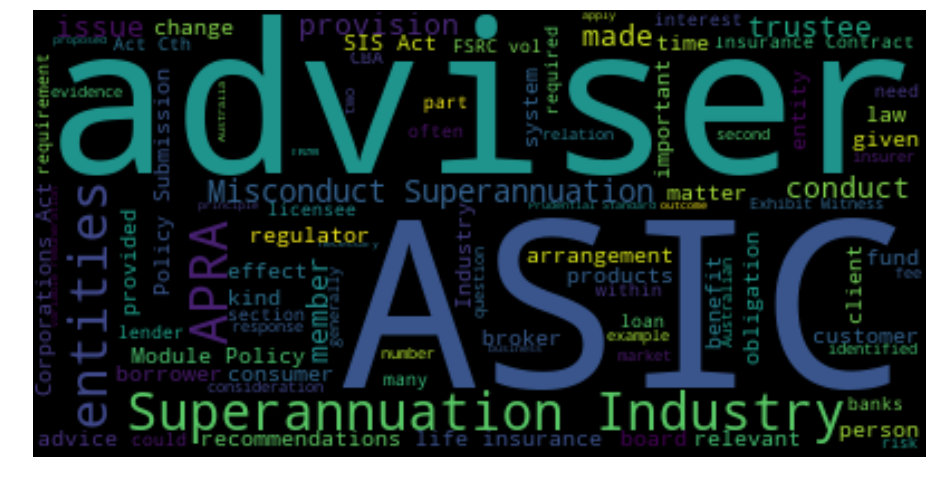

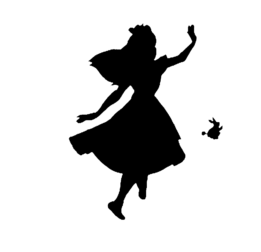

In [78]:
#Display word cloud
plt.figure(figsize=(16,13))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
# plt.imshow(alice_mask,cmap=plt.cm.gray, interpolation='bilinear')
plt.imshow(alice_mask,cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()